In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Обзор данных

* В качестве датасета рассмотрим классический датасет рукописных цифр MNIST - https://www.kaggle.com/competitions/digit-recognizer/
* В этих данных содержится изображения рукописных цифр
* "Hello world" для computer vision моделей
* Существует 10 уникальных цифр (классов)

In [2]:
data = pd.read_csv("./digit-recognizer/train.csv")
data.head(5)

In [3]:
data_numpy = data.to_numpy()
plt.imshow(data_numpy[10][1:].reshape(28, 28))

In [53]:
print(data.shape)

Датасет содержит 42000 картинок размерности 28x28

Разделим data на X и Y и выделим обучающую и тестовую выборки:

* test_size - доля тестовой выборки (20%)
* random_state (random_seed) - рекомендуется использовать одно и то же значение при рандомизации для воспроизводимости результатов

In [55]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=["label"])
y = data["label"]

X_train, X_validate, y_train, y_validate = train_test_split(X, y, train_size=0.8, random_state=42)

## Logistic Regression
* Когда мы говорим о бинарной классификации (классы 0 и 1, "да"/"нет"), основной бэйзлайн — это логистическая регрессия
* Логистическую регрессию можно реализовать с помощью очень простой нейронной сети.

###  Computation Graph
* Графы вычислений — удобное представление математического выражения
* Например, у нас есть функция $$c = \sqrt{a^2 + b^2}$$
* А ниже - соответствующий ей граф вычислений

<a ><img src="d.jpg" alt="d" border="0"></a>

* Теперь давайте посмотрим на график вычислений логистической регрессии:
<a><img src="5.jpg" alt="5" border="0"></a>
    * Параметры модели - weights (веса) and bias (сдвиг, смещение).
    * Weights: коэффициенты для каждого пикселя
    * Bias: смещение
    * z = (w.t)x + b 
    * Простым языком: z = b + px1*w1 + px2*w2 + ... + px4096*w4096
    * y_head = sigmoid(z)
    * Sigmoid-функция преобразует z в число на отрезке [0, 1], что можно интерпретировать как вероятность
* Почему мы используем сигмовидную функцию?
     * Моделирует вероятность
     * Это дифференцируемая функция, поэтому мы можем использовать ее в алгоритме градиентного спуска

* Пример:
     * Допустим, мы получили z = 4 и помещаем z в сигмовидную функцию. Результат(y_head) почти 0,9. Это означает, что результат нашей классификации равен 1 с вероятностью 90%

Функция потерь для логистической регрессии это logloss:

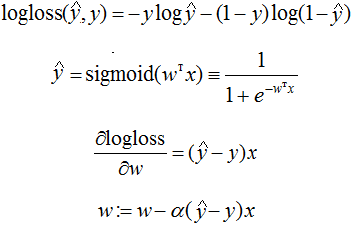

Фактически идея этой функции потерь основывается на знакомом из курса мат. статистики методе максимального правдоподобия. Мы хотим подобрать параметры нашей модели так, чтобы вероятность получить данную выборку была максимальна.

###  Оптимизация функции потерь

Как мы оптимизируем нашу функцию потерь? Gradient decent!

Алгоритм градиентного примерно следующий:
   1. считаем предсказание модели
   2. считаем градиент функции потерь по каждому параметру
   3. обновляем веса модели вычитая из каждого значения градиент умноженный на некоторый коэфицент (learning_rate)
   4. проверяем критерий остановки

In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_validate)

In [58]:
from sklearn.metrics import accuracy_score

accuracy_score(y_validate, y_pred)

In [28]:
from sklearn.model_selection import GridSearchCV

searcher = GridSearchCV(LogisticRegression(), {'penalty': ['l1', 'l2'], 'C': np.logspace(start=-4, stop=2, num=7)},
                        cv=5)

searcher.fit(X_train, y_train)

In [29]:
searcher.best_params_  # Совпало со стандартными :)

<a name="10"></a> <br>
# Artificial Neural Network (ANN) - искусственная нейронная сеть
* **Что такое нейронная сеть:** в самом простом случае берем логистическую регрессию и повторяем ее как минимум 2 раза. По определению — математическая модель, построенная по принципу организации и функционирования биологических нейронных сетей

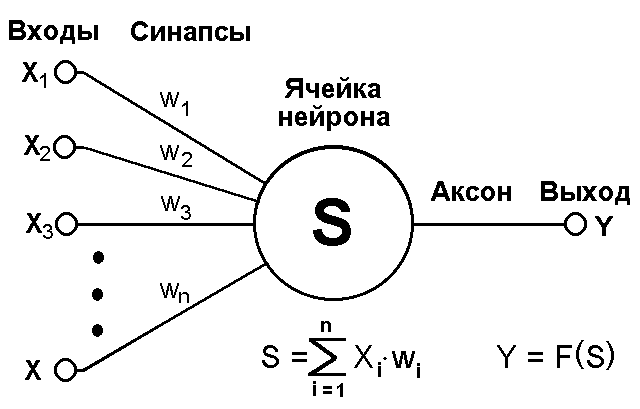
* В логистической регрессии есть входной и выходной слои. Однако в полносвязной нейронной сети между входным и выходным слоями есть как минимум один скрытый слой
* **Почему он называется скрытым:** Потому что скрытый слой не видит входные данные (обучающий набор)
* Например, у вас есть входной, один скрытый и выходной слои. Когда кто-то спросит вас: «Привет, мой друг, сколько слоев у твоей нейронной сети?» Ответ: «У меня двухслойная нейронная сеть». Потому что при вычислении номера слоя входной слой игнорируется.
* Там мы представляли логистическую регрессию в виде графа:

<a ><img src="5.jpg" alt="d" border="0"></a>

* Давайте посмотрим на двухслойную нейронную сеть:

<a ><img src="9.jpg" alt="d" border="0"></a>

   

## Нелинейность

Что вообще такое нелинейность и зачем она нам?

* Мы уже увидели, что нейронная сеть тоже может быть представлена в виде вычислительного графа, т.е. ее можно представить в виде некоторой функции, где значения коэффициентов - это параметры нейронной сети (веса и смещения нейронов)
* TL;DR - нейронная сеть это универсальный аппроксиматор неизвестной функции. Мы подбираем коэффициенты этой функции по имеющимся данным
* Суперпозиция линейных функций - всегда линейная функция. Но как только добавляем нелийненость - можем получить любую нелинейную функцию, т.е. потенциально способны решить любую задачу

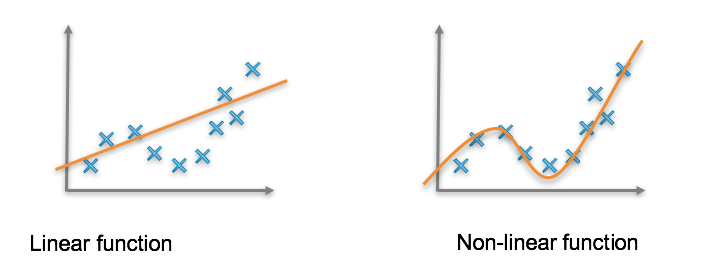

## Функции активации

1. Сигмойда
Формула: 
$$ f(x) = \frac{1}{1 + e^{-x}}$$


In [60]:
x = np.linspace(-5, 5)
y = 1/(1+ np.exp(-x))
dy = np.exp(x) / ((1 + np.exp(x)) * (1 + np.exp(x)))

plt.plot(x, y)
plt.plot(x, dy)

2. Tanh
формула: 
$$ f(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} $$

In [62]:
x = np.linspace(-5, 5)
y = (np.exp(x)- np.exp(-x))/(np.exp(x)+ np.exp(-x))
dy = 4 * np.exp(2 * x) / ((1 + np.exp(2 * x)) * (1 + np.exp(2 * x)))

plt.plot(x, y)
plt.plot(x, dy)

3. ReLU
формула: 
$$ f(x) = max(0, x) $$

In [66]:
x = np.linspace(-5, 5)
y = np.array([max(0, i) for i in x])
dy = np.array([i > 0 for i in x])

plt.plot(x, y)
plt.plot(x, dy)

Создаем модель:
        - 2 скрытых слоя
        - Используем функции активации ReLU
        - Cross entropy loss
        - SGD Optimizer

In [3]:
import torch
from torch import nn
from torch.nn import functional as F

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

In [6]:
from torch.utils.data import TensorDataset, DataLoader

X_train_torch = torch.from_numpy(X_train.to_numpy()).to(dtype=torch.float)
y_train_torch = torch.from_numpy(y_train.to_numpy())

my_dataset = TensorDataset(X_train_torch,y_train_torch) 
train_dataloader = DataLoader(my_dataset)

X_test_torch = torch.from_numpy(X_validate.to_numpy()).to(dtype=torch.float)
y_test_torch = torch.from_numpy(y_validate.to_numpy())

my_dataset_train = TensorDataset(X_test_torch, y_test_torch)  
test_dataloader = DataLoader(my_dataset_train)

In [42]:
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)
        # m.bias.data.fill_(0.01)
    


class SuperDuderNN(nn.Module):

    def __init__(self):
        super().__init__()
        
        self.relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
        
        self.relu_stack.apply(init_weights)
        
        

        

    def forward(self, x):
        logits = self.relu_stack(x)
        return logits


model = SuperDuderNN().to(device)

In [43]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)


def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 10000 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [44]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [45]:
epochs = 3
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

In [50]:

plt.imshow(X_train_torch[10].reshape(28, 28))
x = X_train_torch[10]
x = x.to(device)
model(x)

In [51]:
loss_fn = nn.CrossEntropyLoss()
model = SuperDuderNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-5)

In [52]:
epochs = 3
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")